In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [5]:
df1 = df.reset_index()['Close']

In [6]:
df1.shape

(1009,)

In [7]:
df1.head()

0    254.259995
1    265.720001
2    264.559998
3    250.100006
4    249.470001
Name: Close, dtype: float64

In [8]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [9]:
# Converting the data in the array format

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [11]:
# Splitting dataset into train and test split

training_size = int(len(df1)*0.65)
test_size = len(df)-training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1),:1]

In [12]:
training_size, test_size

(655, 354)

In [13]:
train_data, test_data

(array([[0.04451626],
        [0.06954849],
        [0.06701469],
        [0.03542955],
        [0.03405342],
        [0.05257641],
        [0.05327534],
        [0.0701601 ],
        [0.10133021],
        [0.09750767],
        [0.09757319],
        [0.10301218],
        [0.09667768],
        [0.11369343],
        [0.13167034],
        [0.12391599],
        [0.12559796],
        [0.12343551],
        [0.14672022],
        [0.1771914 ],
        [0.19951508],
        [0.19064677],
        [0.18156003],
        [0.2131015 ],
        [0.19095254],
        [0.17911361],
        [0.19149862],
        [0.19049385],
        [0.18472731],
        [0.17387127],
        [0.18265218],
        [0.18042421],
        [0.15906164],
        [0.14647998],
        [0.18887749],
        [0.1459339 ],
        [0.11334393],
        [0.13426968],
        [0.10137394],
        [0.10875693],
        [0.12026823],
        [0.13125532],
        [0.12007165],
        [0.12243068],
        [0.14021101],
        [0

In [14]:
def create_dataset(dataset, time_step=1):
    data_X, data_Y = [], []
    
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   # i = 0, 0,1,2,3......99 100
        data_X.append(a)
        data_Y.append(dataset[i + time_step, 0])
    return np.array(data_X), np.array(data_Y)

In [15]:
# Reshape into X=t, t+1, t+2, t+3 and Y=t+4

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
X_train

array([[0.04451626, 0.06954849, 0.06701469, ..., 0.32895744, 0.36152555,
        0.34186674],
       [0.06954849, 0.06701469, 0.03542955, ..., 0.36152555, 0.34186674,
        0.35285382],
       [0.06701469, 0.03542955, 0.03405342, ..., 0.34186674, 0.35285382,
        0.34413837],
       ...,
       [0.4212883 , 0.44841749, 0.41300974, ..., 0.70481201, 0.69670829,
        0.63753522],
       [0.44841749, 0.41300974, 0.44474779, ..., 0.69670829, 0.63753522,
        0.61634736],
       [0.41300974, 0.44474779, 0.4367532 , ..., 0.63753522, 0.61634736,
        0.59662302]])

In [17]:
X_train.shape, y_train.shape

((554, 100), (554,))

In [18]:
X_test.shape, y_test.shape

((253, 100), (253,))

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
# Creating the stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\91990\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - loss: 6.7152e-04 - val_loss: 0.0020
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 5.4794e-04 - val_loss: 0.0020
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - loss: 5.1301e-04 - val_loss: 0.0019
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - loss: 5.1536e-04 - val_loss: 0.0024
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - loss: 5.8997e-04 - val_loss: 0.0022
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - loss: 5.2722e-04 - val_loss: 0.0021
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - loss: 6.2594e-04 - val_loss: 0.0018
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - loss: 5.6365e-04 - val_loss: 0.0019
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - loss: 5.0268e-04 - val_loss: 0.0018
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - loss: 5.0939e-04 - val_loss: 0.0018
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - loss: 5.5138e-04 - val_loss: 0.0019
Epoch 12/100
9/9 ━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - loss: 4.3810e-04 - val_loss: 0.0020
Epoch 68/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - loss: 5.1976e-04 - val_loss: 0.0026
Epoch 69/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - loss: 4.8420e-04 - val_loss: 0.0020
Epoch 70/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - loss: 4.1708e-04 - val_loss: 0.0019
Epoch 71/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - loss: 4.7146e-04 - val_loss: 0.0019
Epoch 72/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - loss: 4.9219e-04 - val_loss: 0.0019
Epoch 73/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - loss: 4.0790e-04 - val_loss: 0.0019
Epoch 74/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - loss: 4.8716e-04 - val_loss: 0.0020
Epoch 75/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - loss: 5.8048e-04 - val_loss: 0.0034
Epoch 76/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - loss: 4.6714e-04 - val_loss: 0.0021
Epoch 77/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - loss: 4.5782e-04 - val_loss: 0.0020
Epoch 78/100
9/9 ━━━━━━

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.17.0'

In [26]:
# Predicting and checking the performance

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [27]:
print("Original y_train NaN values:", np.isnan(y_train).sum())
print("Original y_test NaN values:", np.isnan(y_test).sum())

Original y_train NaN values: 0
Original y_test NaN values: 0


In [28]:
print("train_predict NaN values:", np.isnan(train_predict).sum())
print("test_predict NaN values:", np.isnan(test_predict).sum())

train_predict NaN values: 0
test_predict NaN values: 0


In [29]:
# Check inputs to the model
print("Input to model for training NaN values:", np.isnan(X_train).sum())
print("Input to model for testing NaN values:", np.isnan(X_test).sum())

Input to model for training NaN values: 0
Input to model for testing NaN values: 0


In [42]:
# Geting original back

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [43]:
# Performing Calculations

import math

from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

77258162.00968742

In [44]:
# Test data RMSE

math.sqrt(mean_squared_error(y_test, test_predict))

119161814.46529438

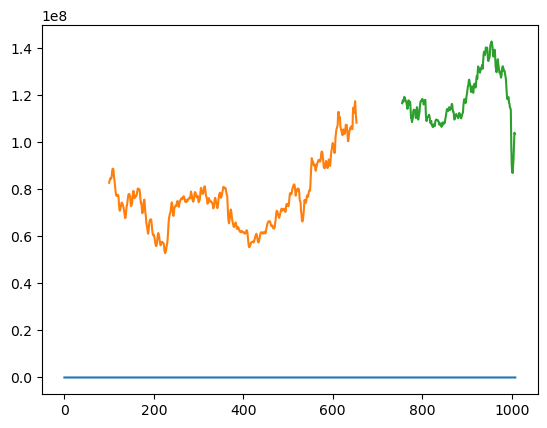

In [45]:
# Plotting

look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
len(test_data)

354

In [48]:
x_input = test_data[254:].reshape(1, -1)
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input)
temp_input = temp_input[0].tolist()

In [50]:
temp_input

[0.7623031220089325,
 0.770232186519946,
 0.7764574241046989,
 0.7460518342503559,
 0.741049807175792,
 0.779297134920363,
 0.7849981594001756,
 0.7830978186350088,
 0.7836438967059076,
 0.7644437065449226,
 0.797667144433283,
 0.8223062503372986,
 0.8284441613012656,
 0.8070377960750383,
 0.8757563085718285,
 0.8851269602135838,
 0.8692906961575151,
 0.8710599825542908,
 0.8587841584420446,
 0.8541971550699885,
 0.8647255577514177,
 0.8735501313222742,
 0.8615145487965392,
 0.8826586764115594,
 0.884908581408719,
 0.854634045922767,
 0.9158383843680022,
 0.9412202154248719,
 0.9562481616145222,
 0.9493895237067091,
 0.9371572940990189,
 0.9614687007370002,
 0.9969856403113886,
 0.9770209932746399,
 0.9694850896844873,
 0.9925732858122798,
 0.9491274149699269,
 0.8995870966094257,
 0.9121032955512327,
 0.9220200252638868,
 0.9021864325955293,
 0.9254931407712357,
 0.9801664073316425,
 0.9730019329394415,
 0.9906293483582447,
 1.0,
 0.9788777395352508,
 0.9718441840840797,
 0.9290317157

In [54]:
# Demonstrating prediction for next 10 days

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        
        # Use x_input instead of input
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)

0 day input [0.77023219 0.77645742 0.74605183 0.74104981 0.77929713 0.78499816
 0.78309782 0.7836439  0.76444371 0.79766714 0.82230625 0.82844416
 0.8070378  0.87575631 0.88512696 0.8692907  0.87105998 0.85878416
 0.85419716 0.86472556 0.87355013 0.86151455 0.88265868 0.88490858
 0.85463405 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729
 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329 0.94912741
 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314 0.98016641
 0.97300193 0.99062935 1.         0.97887774 0.97184418 0.92903172
 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568
 0.83569596 0.804373   0.82743933 0.85559515 0.86105593 0.82374784
 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453
 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443
 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398
 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921 0.623228
 0.63740416 0.60487972 0.61593233 0.59930975 0.35739

7 day output [[0.6389343]]
8 day input [0.76444371 0.79766714 0.82230625 0.82844416 0.8070378  0.87575631
 0.88512696 0.8692907  0.87105998 0.85878416 0.85419716 0.86472556
 0.87355013 0.86151455 0.88265868 0.88490858 0.85463405 0.91583838
 0.94122022 0.95624816 0.94938952 0.93715729 0.9614687  0.99698564
 0.97702099 0.96948509 0.99257329 0.94912741 0.8995871  0.9121033
 0.92202003 0.90218643 0.92549314 0.98016641 0.97300193 0.99062935
 1.         0.97887774 0.97184418 0.92903172 0.91780432 0.92704392
 0.94309869 0.93916696 0.89124314 0.83853568 0.83569596 0.804373
 0.82743933 0.85559515 0.86105593 0.82374784 0.82518942 0.80968086
 0.79532991 0.81072929 0.78019265 0.77073453 0.78604659 0.81046718
 0.83082499 0.83049742 0.82837857 0.82311443 0.82274301 0.8261288
 0.80505013 0.79397565 0.78038929 0.72877398 0.69769113 0.67097703
 0.66833397 0.67049655 0.66258921 0.623228   0.63740416 0.60487972
 0.61593233 0.59930975 0.35739716 0.33478952 0.28950877 0.27483019
 0.33380662 0.32869527 0.42

15 day output [[0.6559827]]
16 day input [0.87105998 0.85878416 0.85419716 0.86472556 0.87355013 0.86151455
 0.88265868 0.88490858 0.85463405 0.91583838 0.94122022 0.95624816
 0.94938952 0.93715729 0.9614687  0.99698564 0.97702099 0.96948509
 0.99257329 0.94912741 0.8995871  0.9121033  0.92202003 0.90218643
 0.92549314 0.98016641 0.97300193 0.99062935 1.         0.97887774
 0.97184418 0.92903172 0.91780432 0.92704392 0.94309869 0.93916696
 0.89124314 0.83853568 0.83569596 0.804373   0.82743933 0.85559515
 0.86105593 0.82374784 0.82518942 0.80968086 0.79532991 0.81072929
 0.78019265 0.77073453 0.78604659 0.81046718 0.83082499 0.83049742
 0.82837857 0.82311443 0.82274301 0.8261288  0.80505013 0.79397565
 0.78038929 0.72877398 0.69769113 0.67097703 0.66833397 0.67049655
 0.66258921 0.623228   0.63740416 0.60487972 0.61593233 0.59930975
 0.35739716 0.33478952 0.28950877 0.27483019 0.33380662 0.32869527
 0.42214021 0.48764772 0.4272515  0.37509011 0.38507243 0.45666251
 0.49736696 0.5351830

23 day output [[0.67667586]]
24 day input [0.85463405 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729
 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329 0.94912741
 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314 0.98016641
 0.97300193 0.99062935 1.         0.97887774 0.97184418 0.92903172
 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568
 0.83569596 0.804373   0.82743933 0.85559515 0.86105593 0.82374784
 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453
 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443
 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398
 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921 0.623228
 0.63740416 0.60487972 0.61593233 0.59930975 0.35739716 0.33478952
 0.28950877 0.27483019 0.33380662 0.32869527 0.42214021 0.48764772
 0.4272515  0.37509011 0.38507243 0.45666251 0.49736696 0.53518301
 0.56775856 0.59375882 0.61304832 0.6262725  0.63448852 0.63893431
 0.64087254 0.64147669

In [56]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [57]:
len(df1)

1009

In [58]:
df3 = df1.tolist()
df3.extend(lst_output)

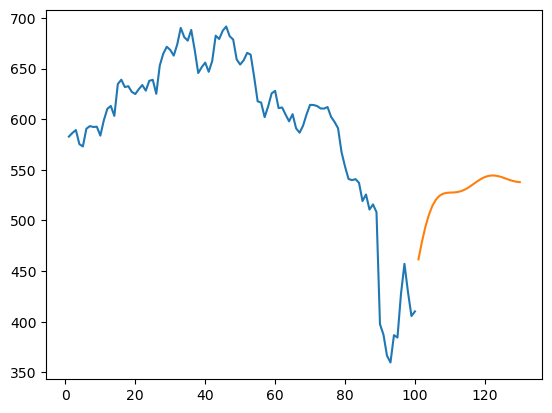

In [60]:
plt.plot(day_new, scaler.inverse_transform(df1[909:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

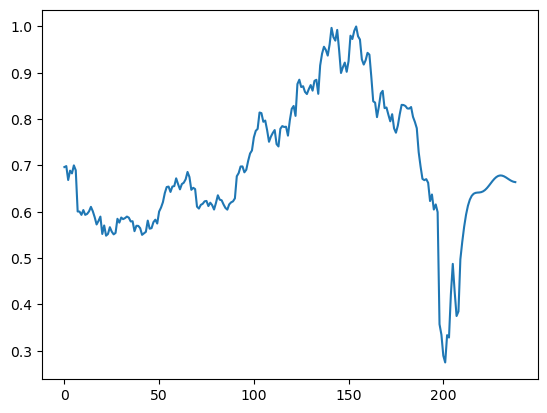

In [64]:
df3 = df1.tolist()
df3.extend(lst_output)

plt.plot(df3[800:])